In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

In [39]:
df = pd.read_csv('emails.csv')

In [40]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [41]:
df.shape

(5728, 2)

In [42]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

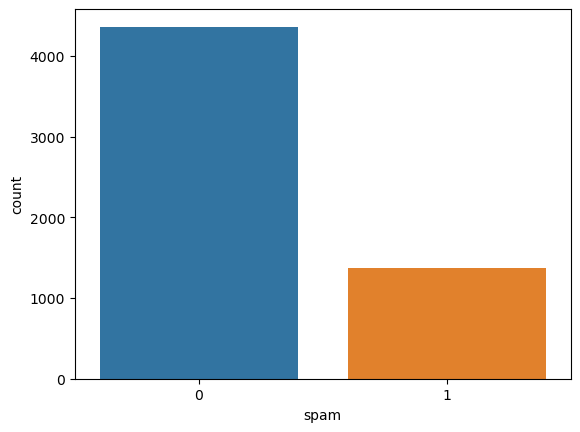

In [43]:
seaborn.countplot(x='spam',data=df)

In [44]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [45]:
X= df.text.values
y= df.spam.values

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=.25,random_state=1)

In [48]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print("Test data accuracy:",accuracy_score(y_test, y_pred))

Test data accuracy: 0.9902234636871509


In [50]:

# K-Fold
logr1=LogisticRegression()
score=cross_val_score(logr1,X_vectorized,y,cv=3)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [0.99057592 0.98585647 0.98952331]
Average Cross Validation (Test data accuracy): 0.9886518987399633


In [51]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [52]:
#Stratified KFold is used for imbalanced data

logr2=LogisticRegression()
score=cross_val_score(logr2,X_vectorized,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [0.9877836  0.9895288  0.9895288  0.99388646 0.9860262 ]
Average Cross Validation (Test data accuracy): 0.9893507700983866
